italicized text# E-Commerce Customer Behaviour ML Project

In [1]:
import pandas as pd
import plotly.express as pltx
import seaborn as sns
import numpy as np



In [2]:
df = pd.read_csv("../Data/customer_dataset.csv")
df.head()

,Customer_ID,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Bronze,720.40,13,4.0,True,55,Unsatisfied


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership_Type           350 non-null    object 
 5   Total_Spend               350 non-null    float64
 6   Items_Purchased           350 non-null    int64  
 7   Average_Rating            350 non-null    float64
 8   Discount_Applied          350 non-null    bool   
 9   Days_Since_Last_Purchase  350 non-null    int64  
 10  Satisfaction_Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [4]:
df.dtypes


Customer_ID                   int64
Gender                       object
Age                           int64
City                         object
Membership_Type              object
Total_Spend                 float64
Items_Purchased               int64
Average_Rating              float64
Discount_Applied               bool
Days_Since_Last_Purchase      int64
Satisfaction_Level           object
dtype: object

In [5]:
df.isnull().sum()


Customer_ID                 0
Gender                      0
Age                         0
City                        0
Membership_Type             0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Discount_Applied            0
Days_Since_Last_Purchase    0
Satisfaction_Level          0
dtype: int64

In [6]:

df.describe()

,Customer_ID,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [7]:
df.drop(columns=['Customer_ID'], inplace=True)

df.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Bronze,720.40,13,4.0,True,55,Unsatisfied


In [8]:
age_bins = [20, 25, 30, 35, 40, 45, float('inf')]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45+']

df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = df['AgeBin'].value_counts().sort_index().reset_index()
age_counts.columns = ['Age Group', 'Age Group Count']

plot = pltx.bar(
    age_counts,
    x='Age Group',
    y='Age Group Count',
    title="Age Group Distribution of Customers",
    text='Age Group Count',
    color='Age Group'
)

plot.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Age Group Count",
    xaxis={'categoryorder': 'array', 'categoryarray': age_labels}
)
plot.show()

In [9]:
age_gender_dist = df.groupby(['Gender', 'AgeBin'])['Gender'].size().reset_index(name='Count')

fig = pltx.line(
    age_gender_dist, 
    x="AgeBin", 
    y="Count", 
    color="Gender", 
    markers=True, 
    title="Age Distribution By Gender"
)

fig.update_xaxes(title="Age Group")
fig.update_yaxes(title="Count")

fig.show()

C:\Users\yatik\AppData\Local\Temp\ipykernel_11140\3267321076.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [10]:
df['Age'].describe()

count    350.000000
mean      33.597143
std        4.870882
min       26.000000
25%       30.000000
50%       32.500000
75%       37.000000
max       43.000000
Name: Age, dtype: float64

In [11]:
location_dist = df['City'].value_counts()

fig = pltx.pie(
    names=location_dist.index,
    values=location_dist.values,
    title="Location Distribution",
    hole=0.4,  
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [12]:
items_purchased_gender = df.groupby("Gender")["Items_Purchased"].mean().reset_index()

fig = pltx.bar(
    items_purchased_gender,
    x="Gender",
    y="Items_Purchased",
    title="Average Items Purchased by Gender",
    color="Gender",
    text_auto=True
)

fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Average Items Buy")
fig.show()

In [13]:
rating_vs_items = df.groupby("Average_Rating")["Items_Purchased"].mean().reset_index()
fig = pltx.bar(
    rating_vs_items,
    x="Average_Rating",
    y="Items_Purchased",
    title="Average Items Purchased by Rating",
    labels={"Average_Rating": "Average Rating", "Items_Purchased": "Average Items Purchased"},
    text_auto=True,
    color="Items_Purchased",
    color_continuous_scale="Blues"
)

fig.show()

In [14]:
gender_items_avg = df.groupby("Gender")["Items_Purchased"].mean().reset_index()

fig = pltx.pie(
    gender_items_avg, 
    names="Gender", 
    values="Items_Purchased", 
    title="Average Items Purchased by Gender",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [15]:
if df["Satisfaction_Level"].dtype == "object":
    df["Satisfaction_Level"] = df["Satisfaction_Level"].astype("category").cat.codes
city_vs_satisfaction = df.groupby("City")["Satisfaction_Level"].mean().reset_index()

fig = pltx.pie(
    city_vs_satisfaction, 
    names="City", 
    values="Satisfaction_Level", 
    title="Average Satisfaction Level by City",
    hole=0.4,
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [16]:
city_vs_items = df.groupby("City")["Items_Purchased"].sum().reset_index()

fig = pltx.bar(
    city_vs_items,
    x="City",
    y="Items_Purchased",
    title="Total Items Purchased by City",
    labels={"City": "City", "Items_Purchased": "Total Items Purchased"},
    text_auto=True,
    color="Items_Purchased",
    color_continuous_scale="Blues"
)

fig.update_xaxes(categoryorder="total descending")

fig.show()

In [17]:
gender_membership = df.groupby(["Gender", "Membership_Type"]).size().reset_index(name="Count")

fig = pltx.bar(
    gender_membership, 
    x="Gender", 
    y="Count", 
    color="Membership_Type", 
    title="Gender vs Membership Type Distribution",
    barmode="group",
    labels={"Count": "Number of Customers", "Gender": "Gender"}
)

fig.show()

In [18]:
gender_avg_rating = df.groupby("Gender")["Average_Rating"].mean().reset_index()

fig = pltx.bar(
    gender_avg_rating,
    x="Gender",
    y="Average_Rating",
    title="Average Rating by Gender",
    labels={"Average_Rating": "Average Rating", "Gender": "Gender"},
    text_auto=True,
    color="Gender",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [19]:
city_membership = df.groupby(["City", "Membership_Type"]).size().reset_index(name="Count")

fig = pltx.bar(
    city_membership, 
    x="City", 
    y="Count", 
    color="Membership_Type", 
    title="Membership Type Distribution by City",
    barmode="group",
    labels={"Count": "Number of Customers", "City": "City"}
)

fig.show()

In [20]:
city_days_purchase = df.groupby("City")["Days_Since_Last_Purchase"].mean().reset_index()

fig = pltx.bar(
    city_days_purchase,
    x="City",
    y="Days_Since_Last_Purchase",
    title="Average Days Since Last Purchase by City",
    labels={"City": "City", "Days_Since_Last_Purchase": "Avg Days Since Last Purchase"},
    color="Days_Since_Last_Purchase",
    color_continuous_scale="Blues"
)

fig.update_xaxes(categoryorder="total descending")  # Sort cities by avg days since last purchase

fig.show()

In [21]:
gender_items_purchased = df.groupby("Gender")["Items_Purchased"].sum().reset_index()
fig = pltx.pie(
    gender_items_purchased,
    names="Gender",
    values="Items_Purchased",
    title="Percentage of Items Purchased by Gender",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [22]:
membership_spend = df.groupby("Membership_Type")["Total_Spend"].sum().reset_index()

fig = pltx.bar(
    membership_spend,
    x="Membership_Type",
    y="Total_Spend",
    title="Total Spend by Membership Type",
    labels={"Membership_Type": "Membership Type", "Total_Spend": "Total Spend"},
    text_auto=True,
    color="Total_Spend",
    color_continuous_scale="Blues"
)

fig.show()

In [23]:
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

fig = pltx.violin(
    df, 
    x="Membership_Type", 
    y="Age", 
    color="Membership_Type",
    box=True,  
    points="all",
    title="Age Group Distribution by Membership Type",
    labels={"Membership_Type": "Membership Type", "Age": "Age"}
)

fig.show()

In [24]:
membership_age = df.groupby(["Membership_Type", "Age"]).size().reset_index(name="Count")

fig = pltx.bar(
    membership_age,
    x="Age",
    y="Count",
    color="Membership_Type",
    title="Distribution of Age by Membership Type",
    labels={"Age": "Age", "Count": "Number of Customers"},
    barmode="group",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [25]:
gender_satisfaction = df.groupby(["Gender", "Satisfaction_Level"]).size().reset_index(name="Count")

fig = pltx.bar(
    gender_satisfaction,
    x="Gender",
    y="Count",
    color="Satisfaction_Level",
    title="Satisfaction Level Distribution by Gender",
    labels={"Gender": "Gender", "Count": "Number of Customers", "Satisfaction_Level": "Satisfaction Level"},
    barmode="group",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [26]:
import seaborn as sns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

df_correlation = df.corr(numeric_only=True)

fig = pltx.imshow(
    df_correlation,
    title="Correlation Matrix Heatmap",
    labels=dict(color="Correlation"),
    color_continuous_scale="Viridis"
)

fig.show()

In [27]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

df_correlation = df.corr(numeric_only=True)

features = df_correlation["Total_Spend"].sort_values(ascending=False).drop("Total_Spend")

fig = pltx.bar(
    x=features.index,
    y=features.values,
    title="Feature Correlation with Total Spend",
    color=features.values,
    color_continuous_scale="Cividis"
)

for i in range(len(features)):
    fig.add_annotation(
        x=features.index[i],
        y=features.values[i],
        text=f"{features.values[i]:.2f}",
        yshift=-10 if features.values[i] < 0 else 10,
        showarrow=False,
    )

fig.update_layout(xaxis_title="Feature", yaxis_title="Correlation")

fig.show()

In [28]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

df_correlation = df.corr(numeric_only=True)

features = df_correlation["Satisfaction_Level"].sort_values(ascending=True).drop("Satisfaction_Level")

fig = pltx.bar(
    x=features.values,
    y=features.index,
    title="Feature Correlation with Satisfaction Level",
    color=features.values,
    orientation="h",
    color_continuous_scale="Plasma"
)

for i in range(len(features)):
    fig.add_annotation(
        x=features.values[i],
        y=features.index[i],
        text=f"{features.values[i]:.2f}",
        xshift=10 if features.values[i] > 0 else -10,
        showarrow=False,
    )

fig.update_layout(xaxis_title="Correlation", yaxis_title="Feature")

fig.show()

In [29]:

import plotly.graph_objects as go

for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

df_correlation = df.corr(numeric_only=True)

age_corr = df_correlation["Age"].sort_values(ascending=False).drop("Age")
items_corr = df_correlation["Items_Purchased"].sort_values(ascending=False).drop("Items_Purchased")

fig = go.Figure()

fig.add_trace(go.Bar(
    x=age_corr.index,
    y=age_corr.values,
    name="Correlation with Age",
    marker_color="blue"
))

fig.add_trace(go.Bar(
    x=items_corr.index,
    y=items_corr.values,
    name="Correlation with Items Purchased",
    marker_color="orange"
))

fig.update_layout(
    title="Feature Correlation with Age & Items Purchased",
    xaxis_title="Feature",
    yaxis_title="Correlation",
    barmode="group"
)

fig.show()

In [30]:
from plotly.subplots import *

features = [
    "Total_Spend",
    "Items_Purchased",
    "Average_Rating",
    "Days_Since_Last_Purchase",
]

gender_stats = df.groupby("Gender")[features].describe().reset_index()

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=features,
)

for i, feature in enumerate(features):
    fig.add_trace(
        go.Bar(
            x=gender_stats["Gender"],
            y=gender_stats[(feature, "mean")],
            name="Mean",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

    fig.add_trace(
        go.Bar(
            x=gender_stats["Gender"],
            y=gender_stats[(feature, "std")],
            name="Std",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

fig.update_layout(
    title="Customer Statistics by Gender",
    showlegend=False,
)

fig.update_yaxes(title_text="Mean", row=1, col=1)
fig.update_yaxes(title_text="Std", row=2, col=1)

fig.show()

In [31]:
features = [
    "Total_Spend",
    "Items_Purchased",
    "Average_Rating",
    "Days_Since_Last_Purchase",
]

membership_stats = df.groupby("Membership_Type")[features].describe().reset_index()

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=features,
)

for i, feature in enumerate(features):
    fig.add_trace(
        go.Bar(
            x=membership_stats["Membership_Type"],
            y=membership_stats[(feature, "mean")],
            name="Mean",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

    fig.add_trace(
        go.Bar(
            x=membership_stats["Membership_Type"],
            y=membership_stats[(feature, "std")],
            name="Std",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

fig.update_layout(
    title="Customer Statistics by Membership Type",
    showlegend=False,
)

fig.update_yaxes(title_text="Mean", row=1, col=1)
fig.update_yaxes(title_text="Std", row=2, col=1)

fig.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler  

In [33]:
dk = df.drop(columns=['Satisfaction_Level'], errors='ignore')
categorical_features = ['Membership_Type']
numerical_features = ['Total_Spend', 'Items_Purchased', 'Average_Rating', 'Days_Since_Last_Purchase', 'Age']


In [34]:
for col in categorical_features:
    dk[col] = pd.Categorical(dk[col]).codes


scaler = StandardScaler()
dk[numerical_features] = scaler.fit_transform(dk[numerical_features])


dk.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,AgeBin,AgeGroup
0,0,-0.945152,4,1,0.760130,0.337346,1.001981,True,-0.118359,25-29,25-29
1,1,0.082826,2,2,-0.179459,-0.385538,0.139479,False,-0.639907,30-34,30-34
2,0,1.933185,0,0,-0.925570,-0.867461,-1.068024,True,1.148256,40-44,40-44
3,1,-0.739557,5,1,1.756144,1.542153,1.174482,False,-1.086947,30-34,30-34
4,1,-1.356343,3,0,-0.345692,0.096385,-0.033022,True,2.116844,25-29,25-29


In [35]:
df = pd.read_csv("../Data/customer_dataset.csv")
dk = df.drop(columns=['Satisfaction_Level'], errors='ignore')

categorical_features = ['Gender', 'Membership_Type', 'City']
numerical_features = ['Total_Spend', 'Items_Purchased', 'Average_Rating', 'Days_Since_Last_Purchase']

if df['Age'].dtype == 'object':  
    age_mapping = {label: idx for idx, label in enumerate(sorted(df['Age'].unique()))}
    dk['Age'] = df['Age'].map(age_mapping)

for col in categorical_features:
    dk[col] = pd.Categorical(dk[col]).codes

for col in numerical_features:
    dk[col].fillna(dk[col].mean(), inplace=True)

for col in categorical_features:
    dk[col].fillna(dk[col].mode()[0], inplace=True)

dk = dk.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
dk[numerical_features] = scaler.fit_transform(dk[numerical_features])

assert dk.isnull().sum().sum() == 0, "There are still NaN values!"

inertia = []
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    print(f"Training KMeans with {k} clusters")
    k_means = KMeans(n_clusters=k, random_state=42, n_init=10)
    k_means.fit(dk)
    inertia_ = k_means.inertia_
    silhouette_scores_ = silhouette_score(dk, k_means.labels_)
    inertia.append(inertia_)
    silhouette_scores.append(silhouette_scores_)
    print("Inertia:", inertia_)
    print("Silhouette Score:", silhouette_scores_)
    print("")

C:\Users\yatik\AppData\Local\Temp\ipykernel_11140\2700044650.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yatik\AppData\Local\Temp\ipykernel_11140\2700044650.py:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Training KMeans with 2 clusters
Inertia: 904304.5455434138
Silhouette Score: 0.6186782097557806

Training KMeans with 3 clusters
Inertia: 408193.61564556835
Silhouette Score: 0.574728029061651

Training KMeans with 4 clusters
Inertia: 234481.4587836321
Silhouette Score: 0.5477332643433899

Training KMeans with 5 clusters
Inertia: 154153.32132675496
Silhouette Score: 0.5276767448751806

Training KMeans with 6 clusters
Inertia: 110387.4722503905
Silhouette Score: 0.5100837311523089

Training KMeans with 7 clusters
Inertia: 84102.5292010213
Silhouette Score: 0.4935405962714986



In [36]:
fig = pltx.line(
    x=k_range,
    y=inertia,
    title="Inertia vs Number of Clusters",
    labels={"x": "Number of Clusters", "y": "Inertia"},
)

fig.show()

In [37]:
fig = pltx.line(
    x=k_range,
    y=silhouette_scores,
    title="Score vs Clusters",
    labels={"x": "Clusters", "y": "Score"},
)

fig.show()

In [38]:
levels = df["Satisfaction_Level"].value_counts()

fig = pltx.pie(
    names=levels.index,
    values=levels.values,
    title="Satisfaction Level Distribution",
    color=levels.index
)

fig.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = df["Satisfaction_Level"]

y = LabelEncoder().fit_transform(y)

categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (280, 10), X_test shape: (70, 10), y_train shape: (280,), y_test shape: (70,)


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = df["Satisfaction_Level"]

categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), numerical_features),
        ("one_hot_encoder", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
).fit(X_train)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Preprocessing Completed ✅")

Preprocessing Completed ✅


In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import time

X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = df["Satisfaction_Level"]

categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), numerical_features),
        ("one_hot_encoder", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
).fit(X_train)


In [42]:

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}

for model_name, model in models.items():
    print(f"Training {model_name}")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training {model_name} complete time taken: {end_time - start_time:.2f} seconds\n")

Training Logistic Regression
Training Logistic Regression complete time taken: 0.02 seconds

Training Random Forest
Training Random Forest complete time taken: 0.12 seconds

Training Gradient Boosting
Training Gradient Boosting complete time taken: 0.31 seconds

Training SVM
Training SVM complete time taken: 0.00 seconds

Training Naive Bayes
Training Naive Bayes complete time taken: 0.00 seconds

Training KNN
Training KNN complete time taken: 0.00 seconds



In [43]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error


X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = LabelEncoder().fit_transform(df["Satisfaction_Level"])

categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), numerical_features),
    ("encode", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(preprocessor.fit_transform(X), y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}

results = {}
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    results[name] = {
        "Accuracy": accuracy_score(y_train, y_pred),
        "F1": f1_score(y_train, y_pred, average='weighted'),
        "Recall": recall_score(y_train, y_pred, average='weighted'),
        "Precision": precision_score(y_train, y_pred, average='weighted'),
        "MAE": mean_absolute_error(y_train, y_pred),
        "Time": round(time.time() - start, 2),
    }

results_df = pd.DataFrame(results).T
fig = pltx.bar(results_df, x=results_df.index, y=["Accuracy", "F1", "Recall", "Precision", "MAE"], title="Model Performance", barmode='group')
fig.show()

In [44]:
fig = pltx.bar(
    results_df,
    x=results_df.index,
    y="Time",
    title="Model Training Time",
    labels={"Time": "Training Time (seconds)", "index": "Models"},
    color="Time",
    color_continuous_scale="Blues",
)

fig.show()

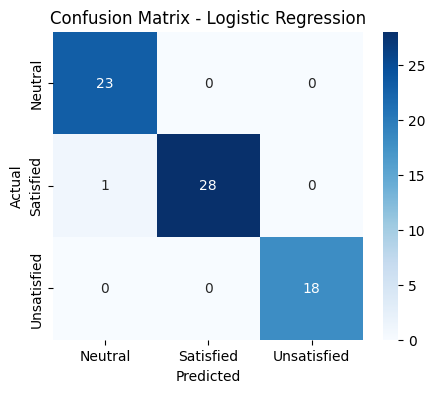

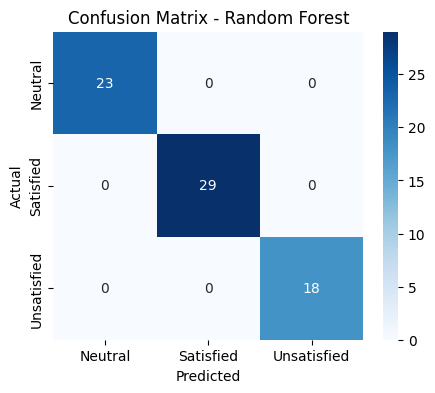

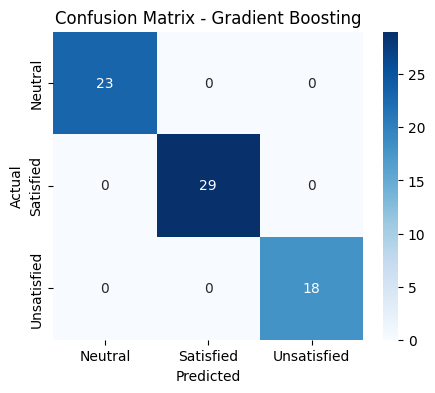

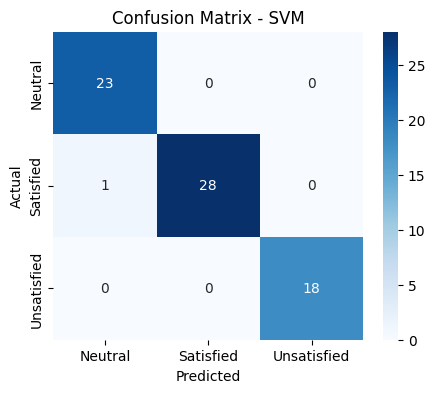

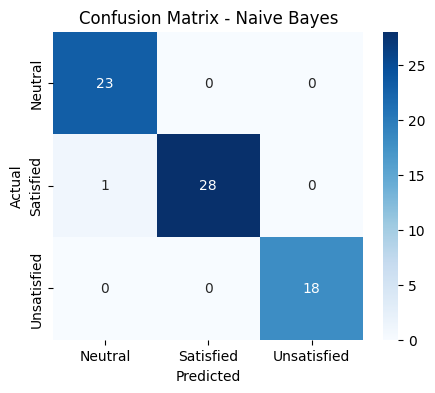

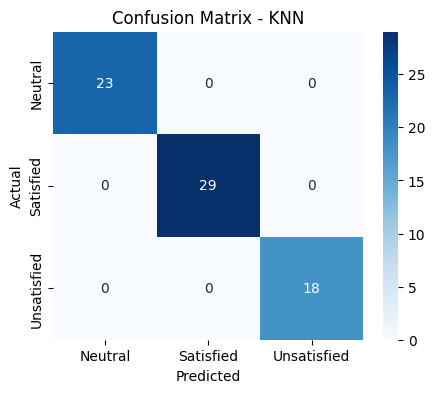

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    "n_estimators": [50, 100, 200],  
    "max_depth": [None, 10, 20, 30],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "bootstrap": [True, False],  
}

rf_model = RandomForestClassifier(random_state=42)

start_time = time.time()
rf_tuner = RandomizedSearchCV(
    rf_model, param_distributions=rf_param_grid, 
    n_iter=20, cv=5, random_state=42, n_jobs=-1
)
rf_tuner.fit(X_train, y_train)

y_pred_rf_tuned = rf_tuner.predict(X_test)
tuning_duration = time.time() - start_time

best_rf_params = rf_tuner.best_params_
best_rf_score = rf_tuner.best_score_

print(f"Best Parameters: {best_rf_params}")
print(f"Best Score: {best_rf_score}")
print(f"Tuning Time: {tuning_duration:.2f} seconds")

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Best Score: 0.9928571428571429
Tuning Time: 7.90 seconds


In [47]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

y_pred_tuned = rf_tuner.predict(X_test)

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
    }

original_rf_metrics = evaluate_model(y_test, y_pred_original)
tuned_rf_metrics = evaluate_model(y_test, y_pred_tuned)

performance_df = pd.DataFrame({"Original RF": original_rf_metrics, "Tuned RF": tuned_rf_metrics})

print("Model Performance Comparison (Original vs Tuned RandomForest):")
display(performance_df)

import plotly.express as px
fig = px.bar(
    performance_df.T, 
    barmode="group",
    title="Performance Comparison: Original vs Tuned RandomForest",
)
fig.show()

Model Performance Comparison (Original vs Tuned RandomForest):


,Original RF,Tuned RF
Accuracy,1.0,1.0
F1 Score,1.0,1.0
Recall,1.0,1.0
Precision,1.0,1.0


In [48]:
for param, value in best_rf_params.items():
    print(f"✅ {param}: {value}")

✅ n_estimators: 50
✅ min_samples_split: 5
✅ min_samples_leaf: 2
✅ max_depth: 30
✅ bootstrap: False


In [49]:

feature_importances = rf_tuner.best_estimator_.feature_importances_

feature_names = preprocessor.get_feature_names_out()

feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)

fig = px.bar(
    feature_importance_df,
    x="Feature",
    y="Importance",
    title="Feature Importance (Tuned RandomForest)",
    text=feature_importance_df["Importance"].apply(lambda x: f"{x:.4f}"),
    color="Importance",
    color_continuous_scale="Blues"
)

fig.show()